# Titanic Passenger Survival Prediction

**1. Problem Statement**

During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class.
The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival.

**2. Objectives of the Project**
*  Understand passenger survival patterns
*  Perform basic data preprocessing
*  Conduct minimal but meaningful EDA
*  Build binary classification models
*  Evaluate model performance
*  Identify key survival-influencing features

# 3. Dataset Description

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
df.shape

(891, 12)

In [5]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# 4. Exploratory Data Analysis (EDA) - Minimal Graphs

Graph 1: Survival Count Plot

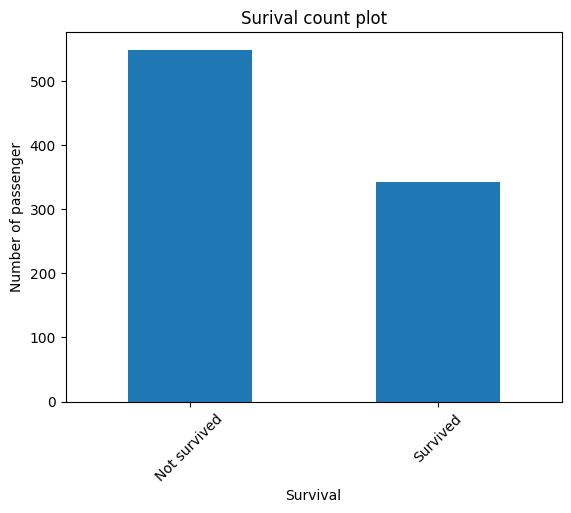

In [7]:
plt.figure()
survival_counts = df['Survived'].value_counts()

survival_counts.plot(kind='bar')
plt.xlabel("Survival")
plt.ylabel("Number of passenger")
plt.title('Surival count plot')
plt.xticks(ticks=[0,1],labels=['Not survived','Survived'],rotation=45)
plt.show()

Graph 2: Survival by Gender

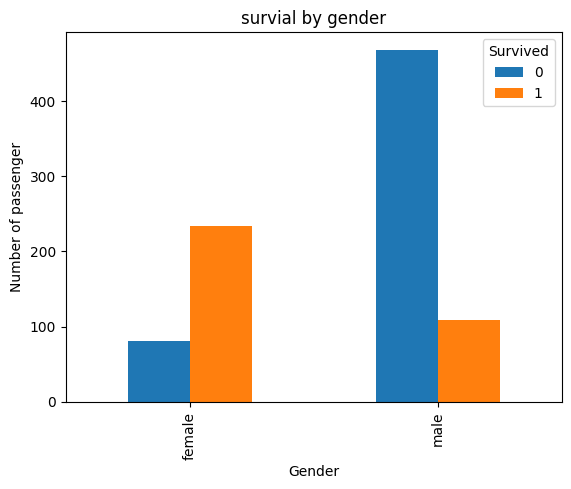

In [8]:

gender_survival = df.groupby(['Sex','Survived']).size().unstack()

gender_survival.plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Number of passenger")
plt.title('survial by gender')
plt.show()

Graph 3: Survival by Passenger Class

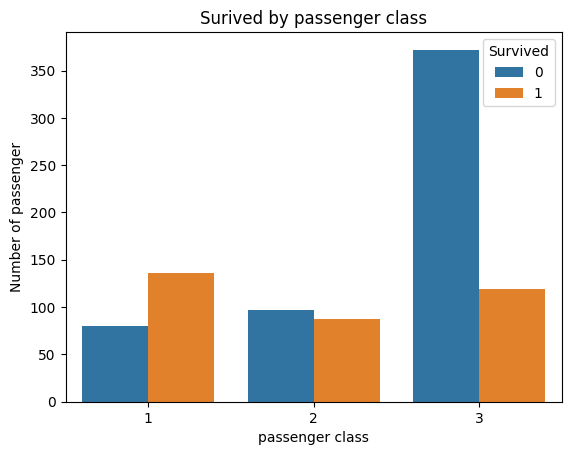

In [9]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.xlabel("passenger class")
plt.ylabel("Number of passenger")
plt.title("Surived by passenger class")
plt.show()

Graph 4: Fare vs Survival

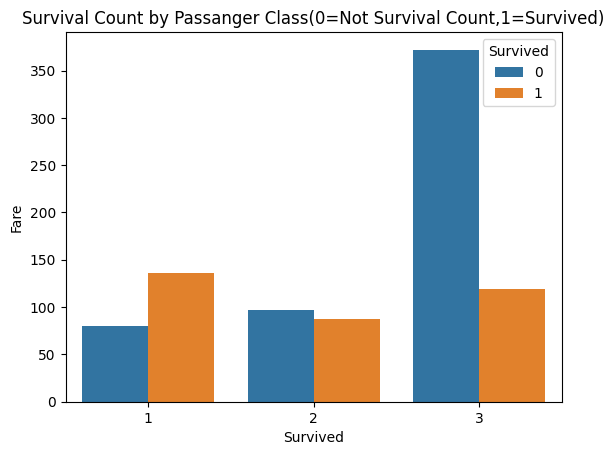

In [10]:
sns.countplot(x='Pclass',hue="Survived",data=df)
plt.title('Survival Count by Passanger Class(0=Not Survival Count,1=Survived)')
plt.xlabel("Survived")
plt.ylabel("Fare")

plt.show()

# 5. Machine Learning Workflow

Load the dataset

In [11]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Handle missing values (Age, Embarked)

In [12]:
df["Age"] = df["Age"].fillna(df["Age"].median())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode([0]))
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Drop columns with high missing values (Cabin)

In [13]:
df.drop('Cabin',axis=1,inplace=True)

Encode categorical variables (Sex, Embarked)

In [14]:
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

Scale  features

In [15]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df[['Survived']]

Split data into training and testing sets

In [16]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25,random_state=42
)

# 6. Models Used

Logistic Regression

In [17]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Decision Tree

In [18]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

Random Forest

In [19]:
rf = RandomForestClassifier(
    n_estimators=125,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=125, random_state=42)

# 7. Model Evaluation

Graph 5: Confusion Matrix

In [20]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[112  22]
 [ 23  66]]


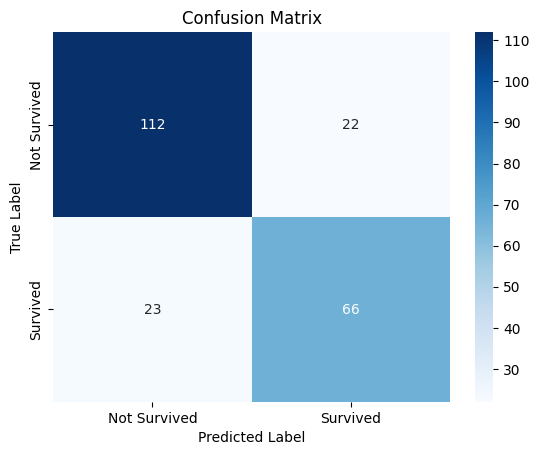

In [22]:
plt.figure()
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Survived", "Survived"],
    yticklabels=["Not Survived", "Survived"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Metrics bold text**

**Accuracy and Precision and Recall and F1 Score**




In [23]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

In [24]:
print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-Score  :", f1)

Accuracy  : 0.7982062780269058
Precision : 0.75
Recall    : 0.7415730337078652
F1-Score  : 0.7457627118644068


**8.Identifying Survival-Influencing Factors bold text**

**Graph 6: Feature Importance (Random Forest)**

In [25]:
feature_importance = rf.feature_importances_

features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

In [26]:
importance_df = importance_df.sort_values(
    by='Importance',
    ascending=False
)
importance_df

,Feature,Importance
5,Fare,0.273100
1,Sex,0.263878
2,Age,0.254275
0,Pclass,0.085526
3,SibSp,0.050482
4,Parch,0.039468
6,Embarked,0.033271


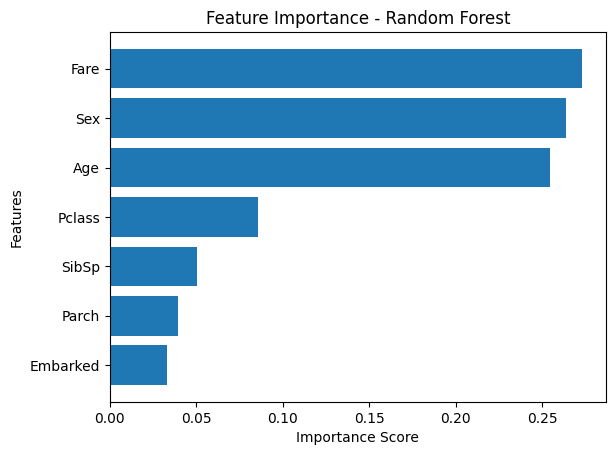

In [27]:
plt.figure()
plt.barh(
    importance_df['Feature'],
    importance_df['Importance']
)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()